# Meanshift Object Tracker

<hr>
<br>
<h3> Benzaied Saifeddine 

<h6> RT5
<hr>
<br>

Prise en main : En première étape de ce TP, vous devez d'abord essayer de comprendre le code et le faire tourner sur la vidéo mise par défaut.

In [1]:
import numpy as np
import cv2 as cv


cap = cv.VideoCapture("Easy.mp4")
# take first frame of the video
ret,frame = cap.read()

# setup initial location of window
x, y, w, h = 300, 200, 100, 50 # simply hardcoded the values

track_window = (x, y, w, h)
test_img = cv.rectangle(frame, (x,y), (x+w,y+h), 255,2)
cv.imshow('test_img',test_img)
# set up the ROI for tracking
roi = frame[y:y+h, x:x+w]
hsv_roi =  cv.cvtColor(roi, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
roi_hist = cv.calcHist([hsv_roi],[0],mask,[180],[0,180])
cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)
# Setup the termination criteria, either 10 iteration or move by at least 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1 )
while(1):
    ret, frame = cap.read()
    if ret == True:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        # apply meanshift to get the new location
        ret, track_window = cv.meanShift(dst, track_window, term_crit)
        # Draw it on image
        x,y,w,h = track_window
        img2 = cv.rectangle(frame, (x,y), (x+w,y+h), 255,2)
        cv.imshow('img2',img2)
        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
    else:
        break
        
cv.destroyAllWindows()       
cap.release()



1- Votre première tâche consiste à expliquer en langage naturel chacune des étapes de ce code.
Vous pourrez structurer votre explication dans un algorithme.
Vous devrez prêter une attention particulière aux instructions permettant de comparer les histogrammes de la ROI de référence et du frame courant + celle qui fait appel à la méthode MeanShift. (bien expiquer les méthodes et leurs paramètres respectifs)

<hr>
<br>
<h3> Algorithme de premier code </h3>
    
<br>
    
    
<b> 1- Charger la vidéo :
    
    -Le programme commence par ouvrir une vidéo grâce à cv.VideoCapture().

<b> 2- Choisir une région d'intérêt (ROI) :
    
    -Une fenêtre rectangulaire est définie manuellement autour de l'objet à suivre
    -La ROI est extraite de l'image (frame) actuelle.

<b> 3- Transformer la ROI en HSV :
    
    -La ROI est convertie en HSV (Teinte, Saturation, Valeur) pour faciliter le suivi de la couleur.

<b> 4- Créer un masque et histogramme :
    
    -Un masque est appliqué pour sélectionner uniquement les pixels ayant la bonne plage de teinte.
    -L'histogramme de la ROI est calculé avec cv.calcHist() pour garder une "signature" de couleur.
    -Cet histogramme est normalisé avec cv.normalize() pour éviter les erreurs dues aux variations d'éclairage.

<b> 5- Back-Projection :
    
    -On compare l'histogramme de la ROI avec chaque pixel de l'image actuelle en utilisant Back-Projection.
    -Cela génère une "carte" montrant où l'objet est probablement situé

<b> 6- Appliquer MeanShift :
    
    -La méthode MeanShift déplace la fenêtre de suivi vers la zone où la densité de probabilité (pixels correspondants) est la plus élevée.
    -Fonction utilisée : cv.meanShift(dst, track_window, term_crit)
        *dst : la back-projection
        *track_window : la position initiale du rectangle.
        *term_crit : critère pour arrêter l'algorithme (nombre d'itérations ou mouvement minimal).

<b> 7- Afficher les résultats :
    
    -La fenêtre est mise à jour et tracée sur l'image avec cv.rectangle().
    
<br>
<hr>
<br>

2- A votre avis, pourquoi avoir transformé l'image de RGB à HSV?
<hr>
<br>
L'image est convertie en HSV pour que le suivi soit plus robuste aux variations de lumière.

    -H (Teinte) : représente la couleur (plus stable que RGB).
    -Cela permet de travailler uniquement sur la couleur pour identifier l'objet, sans être perturbé par la luminosité ou l'intensité des pixels.
    
<br>
<hr>
<br>

3- Est-ce l'implantation utilisée ici est bien celle présentée en cours? Expliquez la différence.
<hr>
<br>
Non, l’implémentation utilisée dans le TP n’est pas identique à celle du cours. 

Les différences sont :

<b> Cours : 
    
    -Calcul manuel des poids w_i
    -Réévaluation explicite du coefficient de Bhattacharyya 
    -Mise à jour progressive de la position de la fenêtre.
    -L’algorithme est présenté étape par étape de manière détaillée
    
<b> TP :
    
    -Utilisation de la fonction cv.meanShift() qui encapsule tout.
    -Les calculs internes (poids et mise à jour) sont automatisés et cachés
    -La back-projection est réalisée via cv.calcBackProject() pour simplifier le processus.
    
Donc finalement, on peut dire que le code de TP utilise une version automatisée et simplifiée de Mean-Shift grâce à OpenCV, contrairement au cours où chaque étape est faite manuellement.
    
<br>
<hr>
<br>

# Camshift Object Tracker

4- Maintenant, au lieu de travailler sur cette vidéo, vous allez utiliser vos vidéos respectives.
Vous modifierez les codes en conséquence pour placer le rectangle sur la bonne région d'intérêt.
Pensez à afficher dans le Notebook quelques frames témoins de vos résultats.

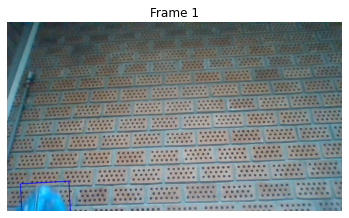

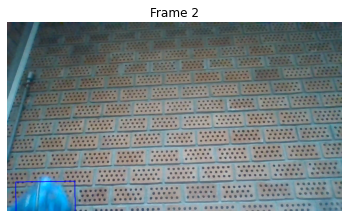

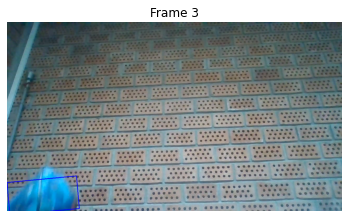

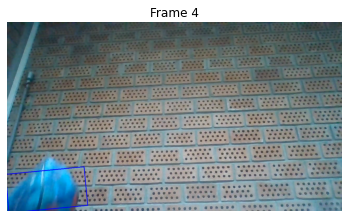

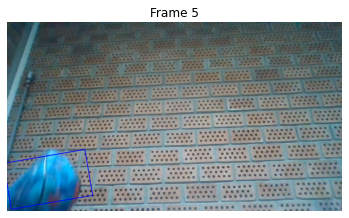

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

cap = cv.VideoCapture("my_video_TPsAV.mp4")

# Aller à 3.5 secondes dans la vidéo
cap.set(cv.CAP_PROP_POS_MSEC, 3500)

# Prendre la première frame après 3.5 secondes
ret, frame = cap.read()
# setup initial location of window
x, y, w, h = 100, 600, 150, 100 # simply hardcoded the values
track_window = (x, y, w, h)
test_img = cv.rectangle(frame, (x,y), (x+w,y+h), 255,2)
cv.imshow('test_img',test_img)
# set up the ROI for tracking
roi = frame[y:y+h, x:x+w]
hsv_roi =  cv.cvtColor(roi, cv.COLOR_BGR2HSV)
mask = cv.inRange(hsv_roi, np.array((0., 60.,32.)), np.array((180.,255.,255.)))
#Calculer l'histogramme de la region track_window
roi_hist = cv.calcHist([hsv_roi],[0],mask,[180],[0,180])
#Normaliser l'histogramme de la roi
cv.normalize(roi_hist,roi_hist,0,255,cv.NORM_MINMAX)
# Setup the termination criteria, either 10 iteration or move by at least 1 pt
term_crit = ( cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1 )

# Affichage de quelques frames
frame_count = 0  # Compteur pour les frames témoins
max_frames_to_show = 5  # Nombre de frames à afficher

while(1):
    ret, frame = cap.read()
    if ret == True:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        # Back Projection : calculate the histogram model of a feature (roi_hist) and use it to find this feature in an image
        dst = cv.calcBackProject([hsv],[0],roi_hist,[0,180],1)
        # apply camshift to get the new location
        ret, track_window = cv.CamShift(dst, track_window, term_crit)
        # Draw it on image
        pts = cv.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv.polylines(frame,[pts],True, 255,2)
        cv.imshow('img2',img2)
        
        # Afficher quelques frames
        if frame_count < max_frames_to_show:
            plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
            plt.title(f"Frame {frame_count + 1}")
            plt.axis('off')
            plt.show()
            frame_count += 1
        
        k = cv.waitKey(30) & 0xff
        if k == 27:
            break
    else:
        break
cv.destroyAllWindows()       
cap.release()

5- En vous basant sur la segmentation de l'objet effectué dans les TPs précedents, vous allez rendre le choix de la ROI automatique pour les 2 algorithmes (Meanshift et Camshift)
Pensez à afficher dans le Notebook quelques frames témoins de vos résultats.

    5-1) En utilisant l'adaptive background segmentation

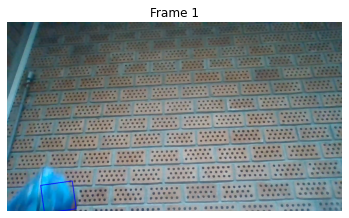

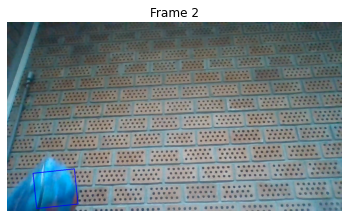

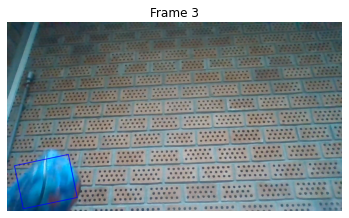

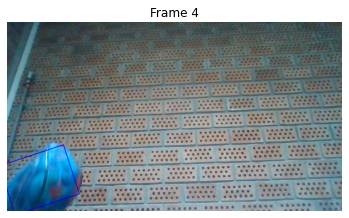

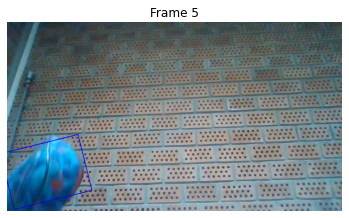

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Charger la vidéo
cap = cv.VideoCapture("my_video_TPsAV.mp4")
if not cap.isOpened():
    print("Erreur : Impossible de charger la vidéo.")
    exit()

# Aller à 3.5 secondes dans la vidéo
cap.set(cv.CAP_PROP_POS_MSEC, 3500)

# Paramètres d'adaptation du fond
alpha = 0.6  # Coefficient d'adaptation
ret, frame = cap.read()
if not ret:
    print("Erreur : Impossible de lire la première frame.")
    cap.release()
    exit()

# Initialiser le fond
background = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

# Critères d'arrêt pour MeanShift et CamShift
term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)

# Compteurs pour affichage
frame_count = 0
max_frames_to_show = 5

# Définir une variable pour le tracking
roi_defined = False

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Étape 1 : Segmentation par Adaptive Background Subtraction
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    diff = cv.absdiff(background.astype(np.uint8), gray)
    _, mask = cv.threshold(diff, 30, 255, cv.THRESH_BINARY)

    # Opérations morphologiques pour nettoyer le masque
    kernel = np.ones((5, 5), np.uint8)
    mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
    mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)

    # Mise à jour du fond
    background = alpha * gray + (1 - alpha) * background

    # Étape 2 : Détecter l'objet et définir la ROI automatiquement
    contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    if contours and not roi_defined:
        largest_contour = max(contours, key=cv.contourArea)
        if cv.contourArea(largest_contour) > 3500:  # Filtrer les petits objets
            x, y, w, h = cv.boundingRect(largest_contour)
            track_window = (x, y, w, h)
            roi = frame[y:y+h, x:x+w]

            # Calculer l'histogramme HSV de la ROI
            hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)
            mask_roi = cv.inRange(hsv_roi, np.array((0., 60., 32.)), np.array((180., 255., 255.)))
            roi_hist = cv.calcHist([hsv_roi], [0], mask_roi, [180], [0, 180])
            cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX)
            roi_defined = True

    # Étape 3 : Suivi avec CamShift
    if roi_defined:
        hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        ret, track_window = cv.CamShift(dst, track_window, term_crit)

        # Dessiner le polygone de suivi
        pts = cv.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv.polylines(frame, [pts], True, 255, 2)

        # Afficher quelques frames témoins
        if frame_count < max_frames_to_show:
            plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
            plt.title(f"Frame {frame_count + 1}")
            plt.axis('off')
            plt.show()
            frame_count += 1

        # Afficher la vidéo avec suivi
        cv.imshow("Suivi de l'objet", img2)

    # Quitter avec la touche 'q'
    if cv.waitKey(30) & 0xFF == ord('q'):
        break

# Libérer les ressources
cap.release()
cv.destroyAllWindows()

    5-2) En utilisant une segmentation basée sur les couleurs (bleu dans ce cas)

ROI définie automatiquement.


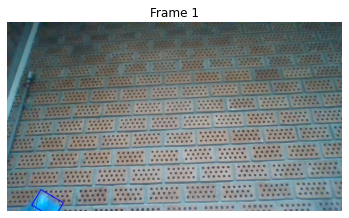

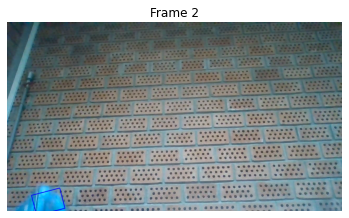

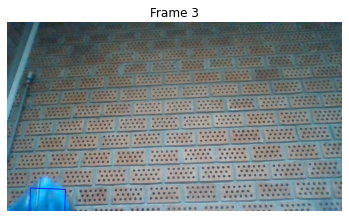

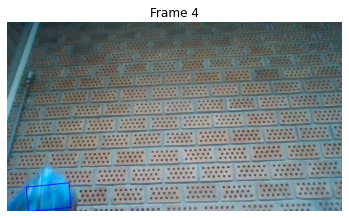

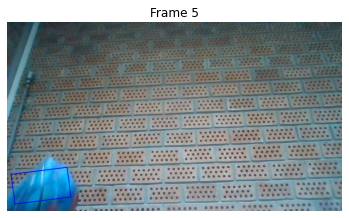

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Charger la vidéo
cap = cv.VideoCapture("my_video_TPsAV.mp4")
if not cap.isOpened():
    print("Erreur : Impossible de charger la vidéo.")
    exit()

# Aller à 3.5 secondes dans la vidéo
cap.set(cv.CAP_PROP_POS_MSEC, 3500)

# Critères d'arrêt pour CamShift
term_crit = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 1)

# Plages HSV pour la couleur bleue
lower_blue = np.array([100, 150, 50])  # Borne inférieure
upper_blue = np.array([140, 255, 255])  # Borne supérieure

# Compteurs pour affichage
frame_count = 0
max_frames_to_show = 5

# Définir une variable pour le tracking
roi_defined = False

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Étape 1 : Convertir l'image en HSV et créer un masque pour le bleu
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    mask = cv.inRange(hsv, lower_blue, upper_blue)

    # Nettoyage du masque (morphologie)
    kernel = np.ones((5, 5), np.uint8)
    mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
    mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)

    # Étape 2 : Détecter les contours des régions bleues
    contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Définir la ROI automatiquement si elle n'est pas encore définie
    if contours and not roi_defined:
        largest_contour = max(contours, key=cv.contourArea)
        if cv.contourArea(largest_contour) > 100:  # Filtrer les petits objets
            x, y, w, h = cv.boundingRect(largest_contour)
            track_window = (x, y, w, h)
            roi = frame[y:y+h, x:x+w]

            # Calculer l'histogramme HSV de la ROI
            hsv_roi = cv.cvtColor(roi, cv.COLOR_BGR2HSV)
            mask_roi = cv.inRange(hsv_roi, lower_blue, upper_blue)
            roi_hist = cv.calcHist([hsv_roi], [0], mask_roi, [180], [0, 180])
            cv.normalize(roi_hist, roi_hist, 0, 255, cv.NORM_MINMAX)
            roi_defined = True
            print("ROI définie automatiquement.")

    # Étape 3 : Suivi avec CamShift
    if roi_defined:
        dst = cv.calcBackProject([hsv], [0], roi_hist, [0, 180], 1)
        ret, track_window = cv.CamShift(dst, track_window, term_crit)

        # Dessiner le polygone de suivi
        pts = cv.boxPoints(ret)
        pts = np.int0(pts)
        img2 = cv.polylines(frame, [pts], True, 255, 2)

        # Afficher quelques frames témoins
        if frame_count < max_frames_to_show:
            plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
            plt.title(f"Frame {frame_count + 1}")
            plt.axis('off')
            plt.show()
            frame_count += 1

        # Afficher la vidéo avec suivi
        cv.imshow("Suivi de l'objet (CamShift)", img2)

    # Quitter avec la touche 'q'
    if cv.waitKey(30) & 0xFF == ord('q'):
        break

# Libérer les ressources
cap.release()
cv.destroyAllWindows()